In [3]:
library(wooldridge)
library(stargazer)
library(knitr)


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [4]:
pacman::p_load(wooldridge,stargazer,broom,tidyverse,ggplot2,
               dplyr,tidyr,moderndive,jtools,sjPlot,dotwhisker,FSA,QuantPsyc)

When the dependent variable y takes on strictly positive values, models based on the logged form of the dependent variable log(y) often satisfy the CLM assumptions more closely than those using y. Further, models using dependent variables that are strictly positive often suffer from heteroskedasticity. 

Using log(y)
 can often attenuate these problems.
 
Taking the log of a variable also narrows its range. Narrowing the ranges of both the dependent and independent variables can make the OLS estimates less sensitive to extreme values.

Since the log function is not defined for values less than zero, using a model with log(y)

 when y
 can take on negative values will not work without further transformations to the dependent variable.
 
 
For values of y
 less than 1, and especially those close to zero, the logged value of the dependent variable can become very large in absolute value relative to the level value of the dependent variable.
 
 
 
 %Δy=(100β2)Δx
 
 
 
 
 The exact change in the predicted value of the dependent variable yˆ, for a given change in the dependent variable x2
, can be calculated using the following formula:



%Δyˆ=100×(exp(β2ˆΔx2)−1)





# Example 6.1: Effects of Pollution on Housing Prices, standardized.
http://fmwww.bc.edu/gstat/examples/wooldridge/

    Example 6.1: Effect of Pollution on Housing Prices

use http://fmwww.bc.edu/ec-p/data/wooldridge/hprice2

reg price nox crime rooms dist stratio, beta



In [90]:
data("hprice2")
?hprice2

$$price = \beta_0 + \beta_1nox + \beta_2crime + \beta_3rooms + \beta_4dist + \beta_5stratio + \mu$$

Estimate the usual lm model.


Estimate the same model, but standardized coefficients by wrapping each variable with R's scale function:

$$\widehat{zprice} = \beta_1znox + \beta_2zcrime + \beta_3zrooms + \beta_4zdist + \beta_5zstratio$$


Compare results, and observe

In [44]:
housing_level <- lm(price ~ nox + crime + rooms + dist + stratio, data = hprice2)

In [47]:
QuantPsyc::lm.beta(housing_level) # Beta coefficients with no standard errors.

nox      crime      rooms       dist    stratio 
-0.3404460 -0.1432828  0.5138878 -0.2348385 -0.2702799

### Beta coefficients (Example 6.1)

To estimate beta coefficients I use the QuantPsyc package. Its lm.beta function is neat, however, it does not provide standard errors of the coefficients. Thus, I use the Make.Z() function to obtain z-values for the whole sample, turn it into a data frame and estimate the model as usual.

In [15]:
data(hprice2, package='wooldridge')

# Estimate model with standardized variables:
lm(scale(price) ~ 0+scale(nox)+scale(crime)+scale(rooms)+
                              scale(dist)+scale(stratio), data=hprice2)


Call:
lm(formula = scale(price) ~ 0 + scale(nox) + scale(crime) + scale(rooms) + 
    scale(dist) + scale(stratio), data = hprice2)

Coefficients:
    scale(nox)    scale(crime)    scale(rooms)     scale(dist)  scale(stratio)  
       -0.3404         -0.1433          0.5139         -0.2348         -0.2703  


In [16]:
library(car)
data(hprice2, package='wooldridge')
res <- lm(log(price)~log(nox)+log(dist)+poly(rooms,2,raw=TRUE)+
           stratio,data=hprice2)

# Manual F test for rooms:
linearHypothesis(res, matchCoefs(res,"rooms"))

# ANOVA (type 2) table:
Anova(res)

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:boot’:

    logit

The following object is masked from ‘package:FSA’:

    bootCase

The following object is masked from ‘package:dplyr’:

    recode

The following object is masked from ‘package:purrr’:

    some



Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
502,48.43305,NA,NA,NA,NA
500,33.59498,2,14.83807,110.4188,1.919325e-40


,Sum Sq,Df,F value,Pr(>F)
log(nox),4.1532032,1,61.81285,2.340671e-14
log(dist),0.2701272,1,4.02035,4.549288e-02
"poly(rooms, 2, raw = TRUE)",14.8380674,2,110.41878,1.919325e-40
stratio,4.4402330,1,66.08477,3.423303e-15
Residuals,33.5949807,500,NA,NA


In [5]:
housing_standardized <- lm(scale(price) ~ 0 + scale(nox) + scale(crime) + scale(rooms) + scale(dist) + scale(stratio), data = hprice2)

In [6]:
summary(housing_level)


Call:
lm(formula = price ~ nox + crime + rooms + dist + stratio, data = hprice2)

Residuals:
   Min     1Q Median     3Q    Max 
-13914  -3201   -662   2110  38064 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20871.13    5054.60   4.129 4.27e-05 ***
nox         -2706.43     354.09  -7.643 1.09e-13 ***
crime        -153.60      32.93  -4.665 3.97e-06 ***
rooms        6735.50     393.60  17.112  < 2e-16 ***
dist        -1026.81     188.11  -5.459 7.57e-08 ***
stratio     -1149.20     127.43  -9.018  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5586 on 500 degrees of freedom
Multiple R-squared:  0.6357,	Adjusted R-squared:  0.632 
F-statistic: 174.5 on 5 and 500 DF,  p-value: < 2.2e-16


In [7]:
summary(housing_standardized)


Call:
lm(formula = scale(price) ~ 0 + scale(nox) + scale(crime) + scale(rooms) + 
    scale(dist) + scale(stratio), data = hprice2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5110 -0.3476 -0.0719  0.2291  4.1334 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
scale(nox)     -0.34045    0.04450  -7.651 1.03e-13 ***
scale(crime)   -0.14328    0.03069  -4.669 3.89e-06 ***
scale(rooms)    0.51389    0.03000  17.129  < 2e-16 ***
scale(dist)    -0.23484    0.04298  -5.464 7.35e-08 ***
scale(stratio) -0.27028    0.02994  -9.027  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.606 on 501 degrees of freedom
Multiple R-squared:  0.6357,	Adjusted R-squared:  0.632 
F-statistic: 174.8 on 5 and 501 DF,  p-value: < 2.2e-16


In [8]:


stargazer(type = "text",housing_level, housing_standardized,  single.row = TRUE, header = FALSE, digits=5)


                                      Dependent variable:                   
                    --------------------------------------------------------
                                price                    scale(price)       
                                 (1)                         (2)            
----------------------------------------------------------------------------
nox                  -2,706.43300*** (354.08690)                            
crime                 -153.60100*** (32.92883)                              
rooms                6,735.49800*** (393.60370)                             
dist                 -1,026.80600*** (188.10790)                            
stratio              -1,149.20400*** (127.42870)                            
scale(nox)                                          -0.34045*** (0.04450)   
scale(crime)                                        -0.14328*** (0.03069)   
scale(rooms)                                         0.51389*** (0.03000)  

In [17]:
jtools::summ(housing_level)

MODEL INFO:
Observations: 506
Dependent Variable: price
Type: OLS linear regression 

MODEL FIT:
F(5,500) = 174.47, p = 0.00
R² = 0.64
Adj. R² = 0.63 

Standard errors: OLS
------------------------------------------------------
                        Est.      S.E.   t val.      p
----------------- ---------- --------- -------- ------
(Intercept)         20871.13   5054.60     4.13   0.00
nox                 -2706.43    354.09    -7.64   0.00
crime                -153.60     32.93    -4.66   0.00
rooms                6735.50    393.60    17.11   0.00
dist                -1026.81    188.11    -5.46   0.00
stratio             -1149.20    127.43    -9.02   0.00
------------------------------------------------------

In [19]:
jtools::summ(housing_level, scale = TRUE)

MODEL INFO:
Observations: 506
Dependent Variable: price
Type: OLS linear regression 

MODEL FIT:
F(5,500) = 174.47, p = 0.00
R² = 0.64
Adj. R² = 0.63 

Standard errors: OLS
-----------------------------------------------------
                        Est.     S.E.   t val.      p
----------------- ---------- -------- -------- ------
(Intercept)         22511.51   248.34    90.65   0.00
nox                 -3135.12   410.17    -7.64   0.00
crime               -1319.47   282.87    -4.66   0.00
rooms                4732.32   276.54    17.11   0.00
dist                -2162.59   396.18    -5.46   0.00
stratio             -2488.97   275.99    -9.02   0.00
-----------------------------------------------------

Continuous predictors are mean-centered and scaled by 1 s.d.

In [18]:
jtools::summ(housing_standardized)

MODEL INFO:
Observations: 506
Dependent Variable: scale(price)
Type: OLS linear regression 

MODEL FIT:
F(5,501) = 174.82, p = 0.00
R² = 0.64
Adj. R² = 0.63 

Standard errors: OLS
---------------------------------------------------
                        Est.   S.E.   t val.      p
-------------------- ------- ------ -------- ------
scale(nox)             -0.34   0.04    -7.65   0.00
scale(crime)           -0.14   0.03    -4.67   0.00
scale(rooms)            0.51   0.03    17.13   0.00
scale(dist)            -0.23   0.04    -5.46   0.00
scale(stratio)         -0.27   0.03    -9.03   0.00
---------------------------------------------------

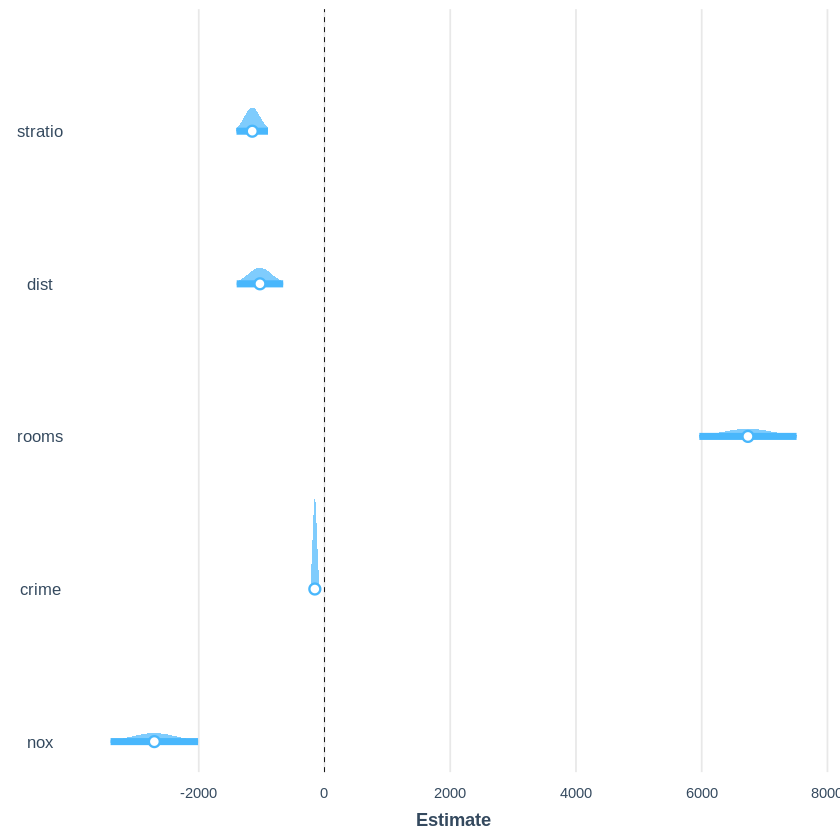

In [15]:
jtools::plot_coefs(housing_level, scale = FALSE, plot.distributions = TRUE, inner_ci_level = .95)

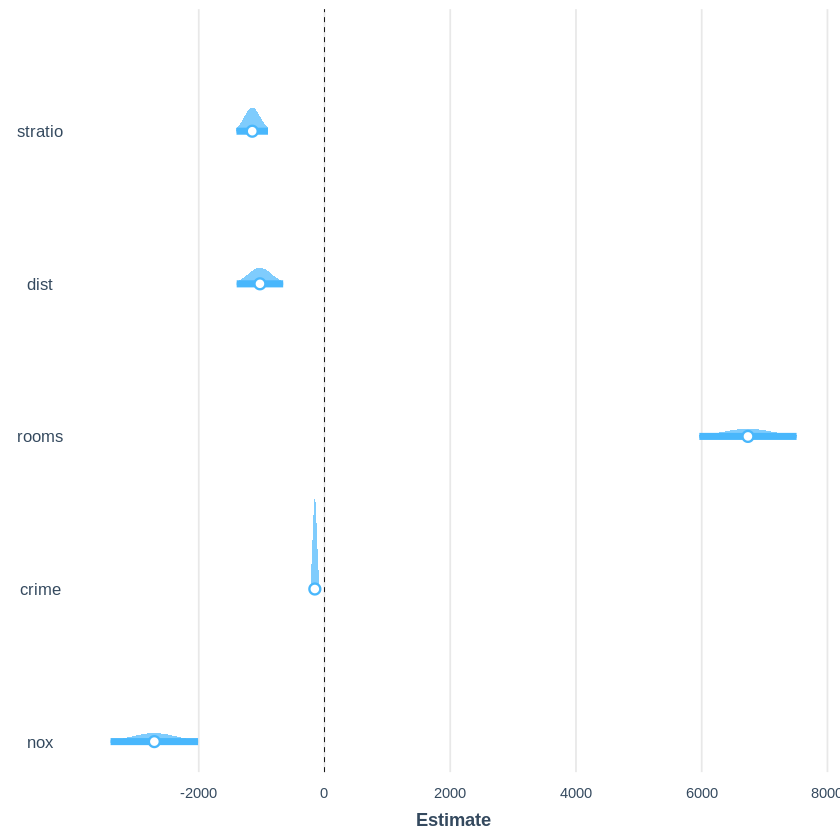

In [14]:
jtools::plot_coefs(housing_level, scale = TRUE, plot.distributions = TRUE, inner_ci_level = .95)

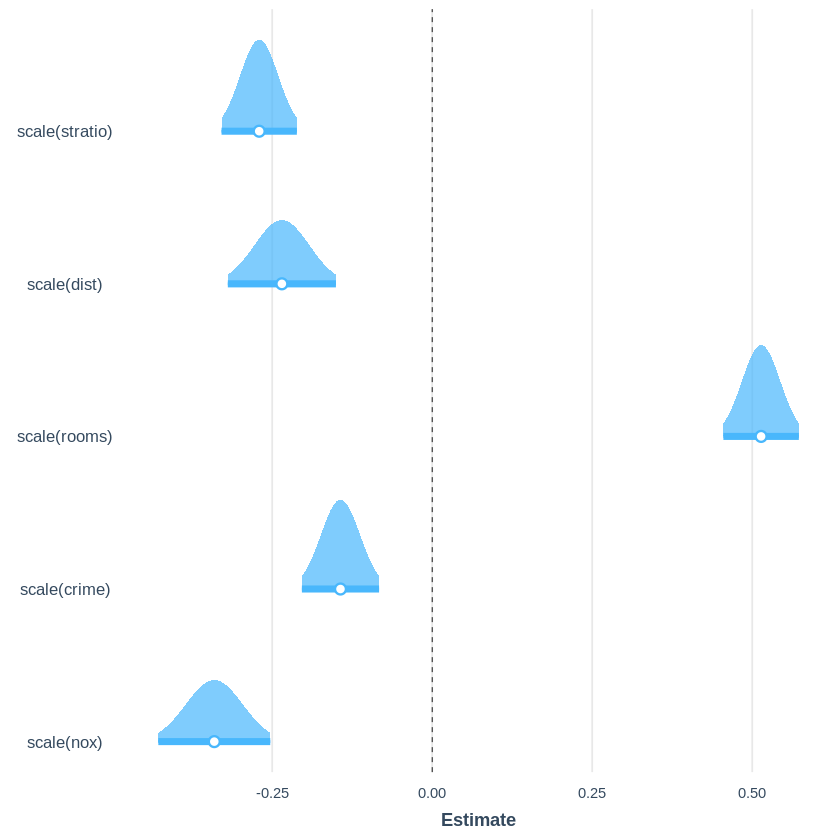

In [16]:
jtools::plot_coefs(housing_standardized, scale = TRUE, plot.distributions = TRUE, inner_ci_level = .95)

# Example 6.2: Effects of Pollution on Housing Prices, Quadratic Interactive Term
Modify the housing model from example 4.5, adding a quadratic term in rooms:

$$log(price) = \beta_0 + \beta_1log(nox) + \beta_2log(dist) + \beta_3rooms + \beta_4rooms^2 + \beta_5stratio + \mu$$


The estimated change in yˆ for a given change in x (specifically, Δx) is given by the derivative of yˆ with respect to x, multiplied by the change in x. In this case, this is (β1ˆ+2β2ˆx)Δx. From this equation you can see that the effect on y of a change in x depends on the beginning value of x, as well as the magnitude of the change in x.




    Example 6.2: Effect of Pollution on Housing Prices

use http://fmwww.bc.edu/ec-p/data/wooldridge/hprice2

gen rooms2=rooms*rooms

gen ldist=log(dist)

reg lprice lnox ldist rooms rooms2 stratio






In [18]:
library(car)
data(hprice2, package='wooldridge')
res <- lm(log(price)~log(nox)+log(dist)+poly(rooms,2,raw=TRUE)+
           stratio,data=hprice2)

# Manual F test for rooms:
linearHypothesis(res, matchCoefs(res,"rooms"))

# ANOVA (type 2) table:
Anova(res)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
502,48.43305,NA,NA,NA,NA
500,33.59498,2,14.83807,110.4188,1.919325e-40


,Sum Sq,Df,F value,Pr(>F)
log(nox),4.1532032,1,61.81285,2.340671e-14
log(dist),0.2701272,1,4.02035,4.549288e-02
"poly(rooms, 2, raw = TRUE)",14.8380674,2,110.41878,1.919325e-40
stratio,4.4402330,1,66.08477,3.423303e-15
Residuals,33.5949807,500,NA,NA


In [17]:
data(hprice2, package='wooldridge')

res <- lm(log(price)~log(nox)+log(dist)+rooms+I(rooms^2)+
           stratio,data=hprice2)
summary(res)

# Using poly(...):
res <- lm(log(price)~log(nox)+log(dist)+poly(rooms,2,raw=TRUE)+
           stratio,data=hprice2)
summary(res)


Call:
lm(formula = log(price) ~ log(nox) + log(dist) + rooms + I(rooms^2) + 
    stratio, data = hprice2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04285 -0.12774  0.02038  0.12650  1.25272 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.385477   0.566473  23.630  < 2e-16 ***
log(nox)    -0.901682   0.114687  -7.862 2.34e-14 ***
log(dist)   -0.086781   0.043281  -2.005  0.04549 *  
rooms       -0.545113   0.165454  -3.295  0.00106 ** 
I(rooms^2)   0.062261   0.012805   4.862 1.56e-06 ***
stratio     -0.047590   0.005854  -8.129 3.42e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2592 on 500 degrees of freedom
Multiple R-squared:  0.6028,	Adjusted R-squared:  0.5988 
F-statistic: 151.8 on 5 and 500 DF,  p-value: < 2.2e-16



Call:
lm(formula = log(price) ~ log(nox) + log(dist) + poly(rooms, 
    2, raw = TRUE) + stratio, data = hprice2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04285 -0.12774  0.02038  0.12650  1.25272 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 13.385477   0.566473  23.630  < 2e-16 ***
log(nox)                    -0.901682   0.114687  -7.862 2.34e-14 ***
log(dist)                   -0.086781   0.043281  -2.005  0.04549 *  
poly(rooms, 2, raw = TRUE)1 -0.545113   0.165454  -3.295  0.00106 ** 
poly(rooms, 2, raw = TRUE)2  0.062261   0.012805   4.862 1.56e-06 ***
stratio                     -0.047590   0.005854  -8.129 3.42e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2592 on 500 degrees of freedom
Multiple R-squared:  0.6028,	Adjusted R-squared:  0.5988 
F-statistic: 151.8 on 5 and 500 DF,  p-value: < 2.2e-16


In [9]:
housing_model_4.5 <- lm(lprice ~ lnox + log(dist) + rooms + stratio, data = hprice2)

housing_model_6.2 <- lm(lprice ~ lnox + log(dist) + rooms + I(rooms^2) + stratio, 
                        data = hprice2)

In [10]:
summary(housing_model_4.5)



Call:
lm(formula = lprice ~ lnox + log(dist) + rooms + stratio, data = hprice2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05890 -0.12427  0.02128  0.12882  1.32531 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.083862   0.318111  34.843  < 2e-16 ***
lnox        -0.953539   0.116742  -8.168 2.57e-15 ***
log(dist)   -0.134339   0.043103  -3.117  0.00193 ** 
rooms        0.254527   0.018530  13.736  < 2e-16 ***
stratio     -0.052451   0.005897  -8.894  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.265 on 501 degrees of freedom
Multiple R-squared:  0.584,	Adjusted R-squared:  0.5807 
F-statistic: 175.9 on 4 and 501 DF,  p-value: < 2.2e-16


In [11]:
summary(housing_model_6.2)


Call:
lm(formula = lprice ~ lnox + log(dist) + rooms + I(rooms^2) + 
    stratio, data = hprice2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04285 -0.12774  0.02038  0.12650  1.25272 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.385478   0.566473  23.630  < 2e-16 ***
lnox        -0.901682   0.114687  -7.862 2.34e-14 ***
log(dist)   -0.086781   0.043281  -2.005  0.04549 *  
rooms       -0.545113   0.165454  -3.295  0.00106 ** 
I(rooms^2)   0.062261   0.012805   4.862 1.56e-06 ***
stratio     -0.047590   0.005854  -8.129 3.42e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2592 on 500 degrees of freedom
Multiple R-squared:  0.6028,	Adjusted R-squared:  0.5988 
F-statistic: 151.8 on 5 and 500 DF,  p-value: < 2.2e-16


In [12]:
stargazer(type = "text",housing_model_4.5, housing_model_6.2,  single.row = TRUE, header = FALSE, digits=5)


                                     Dependent variable:                 
                    -----------------------------------------------------
                                           lprice                        
                               (1)                        (2)            
-------------------------------------------------------------------------
lnox                  -0.95354*** (0.11674)      -0.90168*** (0.11469)   
log(dist)             -0.13434*** (0.04310)       -0.08678** (0.04328)   
rooms                  0.25453*** (0.01853)      -0.54511*** (0.16545)   
I(rooms2)                                         0.06226*** (0.01280)   
stratio               -0.05245*** (0.00590)      -0.04759*** (0.00585)   
Constant              11.08386*** (0.31811)      13.38548*** (0.56647)   
-------------------------------------------------------------------------
Observations                   506                        506            
R2                           0.58403 

Estimate the minimum turning point at which the rooms interactive term changes from negative to positive.

$$x = \frac{\hat{\beta_1}}{2\hat{\beta_2}}$$



In [13]:
beta_1 <- summary(housing_model_6.2)$coefficients["rooms",1] 
beta_2 <- summary(housing_model_6.2)$coefficients["I(rooms^2)",1]
turning_point <- abs(beta_1 / (2*beta_2))

print(turning_point)

[1] 4.37763


In [13]:
#Compute the percent change across a range of average rooms. Include the smallest, turning point, and largest.

Rooms <- c(min(hprice2$rooms), 4, turning_point, 5, 5.5, 6.45, 7.5, max(hprice2$rooms))
Percent.Change <- 100*(beta_1 + 2*beta_2*Rooms)

kable(data.frame(Rooms, Percent.Change))
from <- min(hprice2$rooms)
to <- max(hprice2$rooms)
rooms <- seq(from=from, to =to, by = ((to - from)/(NROW(hprice2)-1)))
quadratic <- abs(100*summary(housing_model_6.2)$coefficients["rooms",1] + 200*summary(housing_model_6.2)$coefficients["I(rooms^2)",1]*rooms)

housing_model_frame <- model.frame(housing_model_6.2)

housing_sq <- abs(beta_1*housing_model_frame[,"rooms"]) + 
              beta_2*housing_model_frame[,"I(rooms^2)"]

#plot(y=hprice2$lprice, x=housing_sq)



|   Rooms| Percent.Change|
|-------:|--------------:|
| 3.56000|     -10.181324|
| 4.00000|      -4.702338|
| 4.37763|       0.000000|
| 5.00000|       7.749903|
| 5.50000|      13.976023|
| 6.45000|      25.805651|
| 7.50000|      38.880503|
| 8.78000|      54.819367|

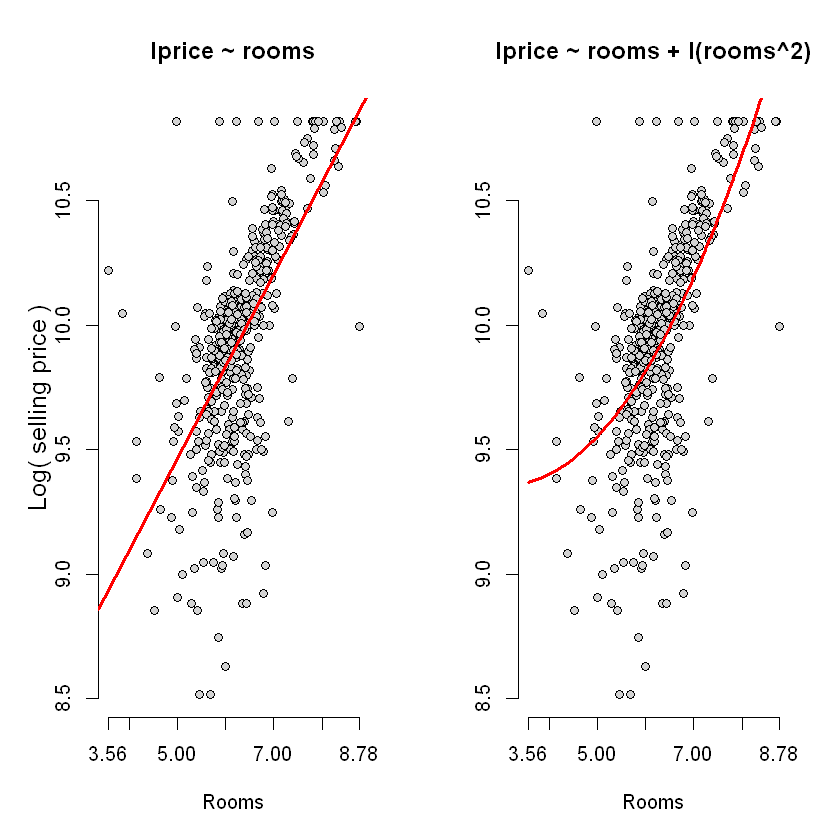

In [14]:
# Graph the log of the selling price against the number of rooms. Superimpose a simple model as well as a quadratic model and examine the difference.

rooms_interaction <- lm(lprice ~ rooms + I(rooms^2), data = hprice2)

par(mfrow=c(1,2))

plot(y = hprice2$lprice, x = hprice2$rooms, xaxt="n", pch = 21, bg = "lightgrey",
     frame = FALSE, main = "lprice ~ rooms", xlab = "Rooms", ylab = "")
mtext(side=2, line=2, "Log( selling price )", cex=1.25)
axis(side = 1, at = c(min(hprice2$rooms), 4, 5, 6, 7, 8, max(hprice2$rooms)))
abline(lm(lprice ~ rooms, data = hprice2), col="red", lwd=2.5)

plot(y = hprice2$lprice, x = hprice2$rooms, xaxt="n", pch = 21, bg = "lightgrey",
     frame = FALSE, main = "lprice ~ rooms + I(rooms^2)", xlab = "Rooms", ylab = " ")
axis(side = 1, at = c(min(hprice2$rooms), 4, 5, 6, 7, 8, max(hprice2$rooms)))
lines(sort(hprice2$rooms), sort(fitted(rooms_interaction)), col = "red", lwd=2.5)

In [9]:
library(car)
data(hprice2, package='wooldridge')
res <- lm(log(price)~log(nox)+log(dist)+poly(rooms,2,raw=TRUE)+
           stratio,data=hprice2)

# Manual F test for rooms:
linearHypothesis(res, matchCoefs(res,"rooms"))

# ANOVA (type 2) table:
Anova(res)

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:FSA’:

    bootCase

The following object is masked from ‘package:dplyr’:

    recode

The following object is masked from ‘package:purrr’:

    some



Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
502,48.43305,NA,NA,NA,NA
500,33.59498,2,14.83807,110.4188,1.919325e-40


,Sum Sq,Df,F value,Pr(>F)
log(nox),4.1532032,1,61.81285,2.340671e-14
log(dist),0.2701272,1,4.02035,4.549288e-02
"poly(rooms, 2, raw = TRUE)",14.8380674,2,110.41878,1.919325e-40
stratio,4.4402330,1,66.08477,3.423303e-15
Residuals,33.5949807,500,NA,NA


## Example-6-3

This example looks at interaction terms. note that you have to use the print command since R will not return this line of code otherwise - and calculate an F-test via anova. The last line gives thee marginal effect of the attendance rate on the outcome variable.


The problem with this coefficient is that there is no standard error for it. This is achieved by demeaning the second variable of the interaction term and estimating the model again.




    Example 6.3: Effect of Attendance on Final Exam Performance

use http://fmwww.bc.edu/ec-p/data/wooldridge/attend

summ priGPA


gen priGPA2=priGPA*priGPA

gen ACT2=ACT*ACT

gen priatn=priGPA*atndrte

reg stndfnl atndrte priGPA ACT priGPA2 ACT2 priatn

    Partial effect of atndrte on stndfnl

display _b[atndrte]+_b[priatn]*2.59


In [19]:
data(attend, package='wooldridge')

# Estimate model with interaction effect:
(myres<-lm(stndfnl~atndrte*priGPA+ACT+I(priGPA^2)+I(ACT^2), data=attend))

# Estimate for partial effect at priGPA=2.59:
b <- coef(myres)
b["atndrte"] + 2.59*b["atndrte:priGPA"] 

# Test partial effect for priGPA=2.59:
library(car)
linearHypothesis(myres,c("atndrte+2.59*atndrte:priGPA"))


Call:
lm(formula = stndfnl ~ atndrte * priGPA + ACT + I(priGPA^2) + 
    I(ACT^2), data = attend)

Coefficients:
   (Intercept)         atndrte          priGPA             ACT     I(priGPA^2)  
      2.050293       -0.006713       -1.628540       -0.128039        0.295905  
      I(ACT^2)  atndrte:priGPA  
      0.004533        0.005586  


atndrte 
0.007754572

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
674,519.3398,NA,NA,NA,NA
673,512.7625,1,6.577213,8.632581,0.003414992


In [20]:
linearHypothesis(myres,c("atndrte+2.59*atndrte:priGPA = 0"))

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
674,519.3398,NA,NA,NA,NA
673,512.7625,1,6.577213,8.632581,0.003414992


In [48]:
data("attend")

lm.1 <- lm(stndfnl ~ atndrte + priGPA + ACT + I(priGPA^2) + I(ACT^2) + I(priGPA*atndrte), data = attend)
lm.2 <- lm(stndfnl ~ priGPA + ACT + I(priGPA^2) + I(ACT^2), data = attend)
summary(lm.1)


Call:
lm(formula = stndfnl ~ atndrte + priGPA + ACT + I(priGPA^2) + 
    I(ACT^2) + I(priGPA * atndrte), data = attend)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1698 -0.5316 -0.0177  0.5737  2.3344 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.050293   1.360319   1.507 0.132225    
atndrte             -0.006713   0.010232  -0.656 0.512005    
priGPA              -1.628540   0.481003  -3.386 0.000751 ***
ACT                 -0.128039   0.098492  -1.300 0.194047    
I(priGPA^2)          0.295905   0.101049   2.928 0.003523 ** 
I(ACT^2)             0.004533   0.002176   2.083 0.037634 *  
I(priGPA * atndrte)  0.005586   0.004317   1.294 0.196173    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8729 on 673 degrees of freedom
Multiple R-squared:  0.2287,	Adjusted R-squared:  0.2218 
F-statistic: 33.25 on 6 and 673 DF,  p-value: < 2.2e-16


In [49]:
anova(lm.1, lm.2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
673,512.7625,NA,NA,NA,NA
675,519.3439,-2,-6.581375,4.319022,0.01368385


In [51]:
lm.1$coefficients[2] + mean(attend$priGPA) * lm.1$coefficient[7]

atndrte 
0.02218604

In [53]:
linearHypothesis(lm.1, c("atndrte=0" ),  vcov = hccm)

Res.Df,Df,F,Pr(>F)
674,NA,NA,NA
673,1,9.651913,0.001971109


In [ ]:
linearHypothesis(lm.1, c("atndrte=0" ),  vcov = hccm)

In [50]:
priGPA.m.atndrte <- (attend$priGPA - mean(attend$priGPA)) * attend$atndrte
lm.1 <- lm(stndfnl ~ atndrte + priGPA + ACT + I(priGPA^2) + I(ACT^2) + priGPA.m.atndrte, data = attend)
summary(lm.1)


Call:
lm(formula = stndfnl ~ atndrte + priGPA + ACT + I(priGPA^2) + 
    I(ACT^2) + priGPA.m.atndrte, data = attend)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1698 -0.5316 -0.0177  0.5737  2.3344 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.050293   1.360319   1.507 0.132225    
atndrte           0.007737   0.002633   2.938 0.003412 ** 
priGPA           -1.628540   0.481003  -3.386 0.000751 ***
ACT              -0.128039   0.098492  -1.300 0.194047    
I(priGPA^2)       0.295905   0.101049   2.928 0.003523 ** 
I(ACT^2)          0.004533   0.002176   2.083 0.037634 *  
priGPA.m.atndrte  0.005586   0.004317   1.294 0.196173    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8729 on 673 degrees of freedom
Multiple R-squared:  0.2287,	Adjusted R-squared:  0.2218 
F-statistic: 33.25 on 6 and 673 DF,  p-value: < 2.2e-16


## Equations 6.23 and 6.24

See how the estimates and R-squared differ between the two models.



True or False: A regression with a higher R2 will always be preferable to one with a lower R2
.
True
False


This statement is false because it is not possible to compare R2 between regressions with different dependent variables (linear vs. log–log models). Furthermore, a model with 100 explanatory variables will likely have a higher R2 than one with 10 explanatory variables. However, if the addition of these extra 90 variables leads to only a minor increase in R2, but causes a big decrease in the precision of the estimates (multicollinearity, loss of degrees of freedom), then the model with the lower R2 may actually be preferable.

In [91]:
data("rdchem")

lm.1 <- lm(rdintens ~ lsales, data = rdchem)
lm.2 <- lm(rdintens ~ sales + salessq, data = rdchem)
summary(lm.1)


Call:
lm(formula = rdintens ~ lsales, data = rdchem)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9710 -1.4323 -0.5639  0.9874  5.7748 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   1.1043     1.5782     0.7    0.490
lsales        0.3017     0.2155     1.4    0.172

Residual standard error: 1.845 on 30 degrees of freedom
Multiple R-squared:  0.06133,	Adjusted R-squared:  0.03004 
F-statistic:  1.96 on 1 and 30 DF,  p-value: 0.1718


In [92]:
summary(lm.2)


Call:
lm(formula = rdintens ~ sales + salessq, data = rdchem)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1418 -1.3630 -0.2257  1.0688  5.5808 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.613e+00  4.294e-01   6.084 1.27e-06 ***
sales        3.006e-04  1.393e-04   2.158   0.0394 *  
salessq     -6.946e-09  3.726e-09  -1.864   0.0725 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.788 on 29 degrees of freedom
Multiple R-squared:  0.1484,	Adjusted R-squared:  0.08969 
F-statistic: 2.527 on 2 and 29 DF,  p-value: 0.09733


In [93]:
stargazer(type = "text",
          lm.1, 
          lm.2,  
          single.row = TRUE, header = FALSE, digits=5)


                               Dependent variable:            
                    ------------------------------------------
                                     rdintens                 
                            (1)                   (2)         
--------------------------------------------------------------
lsales               0.30173 (0.21552)                        
sales                                     0.00030** (0.00014) 
salessq                                   -0.00000* (0.00000) 
Constant             1.10431 (1.57825)   2.61251*** (0.42944) 
--------------------------------------------------------------
Observations                 32                   32          
R2                        0.06133               0.14842       
Adjusted R2               0.03004               0.08969       
Residual Std. Error  1.84534 (df = 30)     1.78770 (df = 29)  
F Statistic         1.96012 (df = 1; 30) 2.52721* (df = 2; 29)
Note:                              *p<0.1; **p<0.05; *

## Example 6.4



    Example 6.4: CEO Compensation and Firm Performance

use http://fmwww.bc.edu/ec-p/data/wooldridge/ceosal

reg salary sales roe


reg lsalary lsales roe





See how the estimates and R-squared differ between the following models.



The formula for the R2‒
 of a regression is:
R2‒=1−(1−R2)/(n−1)n−k−1

where k
 is the number of slope parameters in the model, n is the number of observations, and R2 is the (unadjusted) R-squared. Plugging in the values for these variables yields:
 
 
 
 True or False: R2‒ is an unbiased estimator of the population R-squared, ρ2
.
True
CorrectFalse
 
 
 The R2‒ for a regression is generally not considered to be a better estimator of ρ2 than the R2. Although the R2‒ contains unbiased estimators of the error population error variance and population variance in the dependent variable, the R2‒ is still a biased estimator of the population R2
 
 
 
 

In [94]:
data("ceosal1")

lm.1 <- lm(salary ~ sales + roe, data = ceosal1)
lm.2 <- lm(lsalary ~ lsales + roe, data = ceosal1)
summary(lm.1)


Call:
lm(formula = salary ~ sales + roe, data = ceosal1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1501.8  -492.6  -232.0   123.3 13575.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.306e+02  2.239e+02   3.710 0.000267 ***
sales       1.634e-02  8.874e-03   1.842 0.066973 .  
roe         1.963e+01  1.108e+01   1.772 0.077823 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1359 on 206 degrees of freedom
Multiple R-squared:  0.02917,	Adjusted R-squared:  0.01975 
F-statistic: 3.095 on 2 and 206 DF,  p-value: 0.04739


In [95]:
summary(lm.2)


Call:
lm(formula = lsalary ~ lsales + roe, data = ceosal1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9464 -0.2888 -0.0322  0.2261  2.7830 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.362167   0.293878  14.843  < 2e-16 ***
lsales      0.275087   0.033254   8.272 1.62e-14 ***
roe         0.017872   0.003955   4.519 1.05e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4822 on 206 degrees of freedom
Multiple R-squared:  0.282,	Adjusted R-squared:  0.275 
F-statistic: 40.45 on 2 and 206 DF,  p-value: 1.519e-15


In [96]:
summary(lm.1)$adj.r.squared

[1] 0.01974617

In [97]:
summary(lm.2)$adj.r.squared

[1] 0.2750178

In [98]:
stargazer(type = "text",
          lm.1, 
          lm.2,  
          single.row = TRUE, header = FALSE, digits=5)


                                            Dependent variable:             
                               ---------------------------------------------
                                        salary                lsalary       
                                         (1)                    (2)         
----------------------------------------------------------------------------
sales                             0.01634* (0.00887)                        
lsales                                                  0.27509*** (0.03325)
roe                              19.63097* (11.07655)   0.01787*** (0.00396)
Constant                       830.63130*** (223.90490) 4.36217*** (0.29388)
----------------------------------------------------------------------------
Observations                             209                    209         
R2                                     0.02917                0.28199       
Adjusted R2                            0.01975                0.27502      

Comparisons of the R2 and R2‒ of two models cannot be used to choose between different functional forms of the dependent variable. The reason for this is rather straightforward: The models essentially use two different dependent variables, so each model has a different amount of variation in y to explain. 

Therefore, the two R2 values measure the explained proportion of two different amounts of variation in two different functions of the dependent variation.

## Example 6.5


    Example 6.5: Confidence Interval for Predicted College GPA (Approach in Book)

use http://fmwww.bc.edu/ec-p/data/wooldridge/gpa2

gen hsize2=hsize*hsize

reg colgpa sat hsperc hsize hsize2

    Predicted college GPA

display _b[_cons]+_b[sat]*1200+_b[hsperc]*30+_b[hsize]*5+_b[hsize2]*25
2.7000755

gen sat0=sat-1200

gen hsperc0=hsperc-30

gen hsize0=hsize-5

gen hsize20=hsize2-25

reg colgpa sat0 hsperc0 hsize0 hsize20



    Example 6.5: Confidence Interval for Predicted College GPA (Another Approach)

use http://fmwww.bc.edu/ec-p/data/wooldridge/gpa2

gen hsize2=hsize*hsize

reg colgpa sat hsperc hsize hsize2

set obs 4138

replace sat=1200 in 4138/4138

replace hsperc=30 in 4138/4138

replace hsize=5 in 4138/4138

replace hsize2=25 in 4138/4138

regress

predict colgpahat in 4138/4138,stdp 

predict colgpahatt in 4138/4138,xb

gen lb =  colgpahatt-1.96* colgpahat in 4138/4138

gen ub =  colgpahatt+1.96* colgpahat in 4138/4138

list  colgpahat lb colgpahatt ub in 4138/4138




Compare the usual estimation of a model with a regression, where interesting values - like means - are subtracted from each variable before the estimation.



Based on the R2, since 0.303 > 0.300, model 2 would appear to explain more of the variation in the dependent variable. However, since model 2 has one more parameter than model 1, a simple comparison of only the R2 of each model is not appropriate. For cases such as this, the adjusted R2

 would be better to compare these two models since it cannot decrease when irrelevant variables are added to the model.
Based on the R2‒
, since 0.004 > 0.001, model 1 is the preferred model.





In [21]:
data(gpa2, package='wooldridge')

# Regress and report coefficients
reg <- lm(colgpa~sat+hsperc+hsize+I(hsize^2),data=gpa2)
reg



Call:
lm(formula = colgpa ~ sat + hsperc + hsize + I(hsize^2), data = gpa2)

Coefficients:
(Intercept)          sat       hsperc        hsize   I(hsize^2)  
   1.492652     0.001492    -0.013856    -0.060881     0.005460  


In [23]:

# Generate data set containing the regressor values for predictions
cvalues <- data.frame(sat=1200, hsperc=30, hsize=5)

# Point estimate of prediction
predict(reg, cvalues)



1 
2.700075

In [24]:
# Point estimate and 95% confidence interval
predict(reg, cvalues, interval = "confidence")



,fit,lwr,upr
1,2.700075,2.661104,2.739047


In [25]:
# Define three sets of regressor variables
cvalues <- data.frame(sat=c(1200,900,1400), hsperc=c(30,20,5), 
                                                 hsize=c(5,3,1))
cvalues



sat,hsperc,hsize
1200,30,5
900,20,3
1400,5,1


In [26]:
# Point estimates and 99% confidence intervals for these
predict(reg, cvalues, interval = "confidence", level=0.99)

,fit,lwr,upr
1,2.700075,2.648850,2.751301
2,2.425282,2.388540,2.462025
3,3.457448,3.385572,3.529325


In [99]:
data("gpa2")

lm.1 <- lm(colgpa ~ sat + hsperc + hsize + hsizesq, data = gpa2)
summary(lm.1)


Call:
lm(formula = colgpa ~ sat + hsperc + hsize + hsizesq, data = gpa2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57543 -0.35081  0.03342  0.39945  1.81683 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.493e+00  7.534e-02  19.812  < 2e-16 ***
sat          1.492e-03  6.521e-05  22.886  < 2e-16 ***
hsperc      -1.386e-02  5.610e-04 -24.698  < 2e-16 ***
hsize       -6.088e-02  1.650e-02  -3.690 0.000228 ***
hsizesq      5.460e-03  2.270e-03   2.406 0.016191 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5599 on 4132 degrees of freedom
Multiple R-squared:  0.2781,	Adjusted R-squared:  0.2774 
F-statistic:   398 on 4 and 4132 DF,  p-value: < 2.2e-16


In [100]:
summary(lm.1)$sigma

[1] 0.5598638

In [101]:
lm.1$coefficients

(Intercept)          sat       hsperc        hsize      hsizesq 
 1.492652209  0.001492497 -0.013855782 -0.060881453  0.005460295

In [102]:
lm.1$coefficients[1] + lm.1$coefficients[2] * 1200 + lm.1$coefficients[3] * 30 + 
  lm.1$coefficients[4] * 5 + lm.1$coefficients[5] * 5^2

(Intercept) 
   2.700075

In [103]:
lm.2 <- lm(colgpa ~ I(sat - 1200) + I(hsperc - 30) + I(hsize - 5) + I(hsizesq - 25), data = gpa2) # Estimate the model

s.2 <- summary(lm.2)
s.2


Call:
lm(formula = colgpa ~ I(sat - 1200) + I(hsperc - 30) + I(hsize - 
    5) + I(hsizesq - 25), data = gpa2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57543 -0.35081  0.03342  0.39945  1.81683 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.700e+00  1.988e-02 135.833  < 2e-16 ***
I(sat - 1200)    1.492e-03  6.521e-05  22.886  < 2e-16 ***
I(hsperc - 30)  -1.386e-02  5.610e-04 -24.698  < 2e-16 ***
I(hsize - 5)    -6.088e-02  1.650e-02  -3.690 0.000228 ***
I(hsizesq - 25)  5.460e-03  2.270e-03   2.406 0.016191 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5599 on 4132 degrees of freedom
Multiple R-squared:  0.2781,	Adjusted R-squared:  0.2774 
F-statistic:   398 on 4 and 4132 DF,  p-value: < 2.2e-16


In [104]:
ci.low <- s.2$coefficients[1, 1] - 1.96 * s.2$coefficients[1, 2] # Create confidence intervals
ci.high <- s.2$coefficients[1, 1] + 1.96 * s.2$coefficients[1, 2]
c(ci.low, ci.high)

[1] 2.661115 2.739036

In [105]:
stargazer(type = "text",
          lm.1, 
          lm.2,  
          single.row = TRUE, header = FALSE, digits=5)


                                            Dependent variable:            
                                -------------------------------------------
                                                  colgpa                   
                                         (1)                   (2)         
---------------------------------------------------------------------------
sat                             0.00149*** (0.00007)                       
hsperc                          -0.01386*** (0.00056)                      
hsize                           -0.06088*** (0.01650)                      
hsizesq                          0.00546** (0.00227)                       
I(sat - 1200)                                         0.00149*** (0.00007) 
I(hsperc - 30)                                        -0.01386*** (0.00056)
I(hsize - 5)                                          -0.06088*** (0.01650)
I(hsizesq - 25)                                        0.00546** (0.00227) 
Constant   

True or False: Given your hypothesis, you should include a variable for cigarette consumption in your model.
True
CorrectFalse


Different models serve different purposes. In this case, the model is intended to measure the effect of cigarette taxes on the rates of lung cancer, holding percentage of population above the age of 18 constant. Since cigarette consumption is in the error term, it is allowed to vary as the level of cigarette taxes varies. This is done intentionally, since your hypothesis is that individuals change their cigarette consumption based in the size of the cigarette tax.



Controlling for cigarette consumption, by including it as a variable in the regression, would change the interpretation of β1ˆ
. 

β1ˆ would then estimate the effect of cigarette taxes on the rate of lung cancer, holding cigarette consumption fixed. 

Since the tax would likely affect the rate of lung cancer only by reducing cigarette consumption, the estimate of β1ˆ would become much less useful.

## Example-6-6


    Example 6.6: Confidence Interval for Future College GPA

use http://fmwww.bc.edu/ec-p/data/wooldridge/gpa2

gen hsize2=hsize*hsize

reg colgpa sat hsperc hsize hsize2

set obs 4138

replace sat=1200 in 4138/4138

replace hsperc=30 in 4138/4138

replace hsize=5 in 4138/4138

replace hsize2=25 in 4138/4138

regress


predict cc in 4138/4138,stdf 

predict colgpahatt in 4138/4138,xb

gen lb1 =  colgpahatt-1.96* cc in 4138/4138

gen ub1 =  colgpahatt+1.96* cc in 4138/4138

list  cc lb1 colgpahatt ub1 in 4138/4138





In [107]:
data(gpa2, package='wooldridge')

# Regress (as before)
reg <- lm(colgpa~sat+hsperc+hsize+I(hsize^2),data=gpa2)



,fit,lwr,upr
1,2.700075,1.601749,3.798402
2,2.425282,1.327292,3.523273
3,3.457448,2.358452,4.556444
4,2.631527,1.532210,3.730844


In [108]:
tidy(reg)

term,estimate,std.error,statistic,p.value
(Intercept),1.492652214,7.534142e-02,19.811840,1.585528e-83
sat,0.001492497,6.521336e-05,22.886370,3.027519e-109
hsperc,-0.013855782,5.610052e-04,-24.698136,9.760760e-126
hsize,-0.060881457,1.650123e-02,-3.689509,2.275799e-04
I(hsize^2),0.005460295,2.269848e-03,2.405578,1.619059e-02


In [ ]:
# Define three sets of regressor variables (as before)
cvalues <- data.frame(sat=c(1200,900,1400, 1120), hsperc=c(30,20,5,27), 
                                                 hsize=c(5,3,1,7))

# Point estimates and 95% prediction intervals for these
predict(reg, cvalues, interval = "prediction")

#### Prediction interval 

In general, three quantities are needed to construct a confidence interval around a parameter estimate: the parameter estimate itself θ0ˆ, the standard error of the parameter estimate se(θ0ˆ), and the critical value c. In this case, the parameter estimate for which you would like to construct a confidence interval is a predicted value of a dependent variable. 


The confidence interval around this expected value of college GPA would be


Unlike confidence intervals around slope coefficient estimates, the standard error for the predicted value of the dependent variable, θ0ˆ
, is not always readily available. However, it can be calculated with a new regression fairly easily.




The parameter you are estimating, and would like a confidence interval around, is the predicted value for θ0
. This represents the expected value of colgpa
, given the previously mentioned values of the explanatory variable:
θ0
	 = 
	β0+β11,120+β227+β3 7+β472
	 = 
	E(colgpa | sat=1,120, hsperc=27, hsize=7)
β0
	 = 
	θ0−β11,120−β227−β37−β472
    
    
What you would like to obtain is the standard error of θ0ˆ
 to use in your confidence interval. Plugging β0
 back into the regression equation gives:
colgpa
	 = 
	θ0+β1 (sat−1,120)+β2 (hsperc−27)+β3 (hsize−7)+β4 (hsize2−72)
    
    
In other words, by regressing colgpa
 on the transformed explanatory variables and a constant, you would get:
colgpaˆ
	 = 
	θ0ˆ+β1ˆ (sat−1,120)+β2ˆ (hsperc−27)+β3ˆ (hsize−7)+β4ˆ (hsize2−72)
    
    
Therefore, a regression of colgpa
 on sat−1,120, hsperc−27, hsize−7, and hsize2−72 will yield an intercept parameter estimate θ0ˆ that is equal to the predicted value of colgpa, given the relevant values of the explanatory variables. More importantly, this regression will yield the standard error for θ0ˆ, which is needed to construct a confidence interval around θ0ˆ
.


In this case, θ0ˆ=1.853
, se(θ0ˆ)=0.01, and c is given as 1.96. Therefore, the confidence interval is 1.853 ± (0.01×1.96). This represents a range in which the population parameter θ0 would fall, in 95% of samples.


Now suppose you would like to construct a 95% confidence interval around the college GPA for someone with sat=1,160, hsperc=30, and hsize=5, and not  just the expected value of college GPA for these values of the explanatory variables.



In general, for a predicted value of the dependent variable y0
, the 95% prediction interval can be found using the following formula:
yˆ0 ± c×se(eˆ0)

where c
 is the relevant critical value from the t-distribution and se(eˆ0)
 is:
se(eˆ0)
	 = 
	(se(yˆ0)2+σˆ2)1/2
	 = 
	(0.012+0.452)1/2
	 = 
	0.20261/2
	 = 
	0.4501
since se(yˆ0)=0.01
 and σˆ=0.45
.

The 95% critical value for the t distribution is 1.96, so the prediction interval is 1.853±1.96×0.4501
.
(Note: Most of the variation in the confidence interval comes from the regression error, suggesting that an individual’s future college GPA cannot be accurately pinned down using just SAT score, high school rank, and class size. This means that the unobserved characteristics that affect college GPA vary widely among individuals with the same SAT score, high school rank, and class size.)

In [71]:
data("gpa2")

lm.2 <- lm(colgpa ~ I(sat - 1200) + I(hsperc - 30) + I(hsize - 5) + I(hsizesq - 25), data = gpa2)
s.2 <- summary(lm.2)

se <- sqrt(s.2$coefficients[1, 2]^2 + s.2$sigma^2)
se

[1] 0.5602166

In [72]:
ci.low <- s.2$coefficients[1, 1] - 1.96 * se
ci.high <- s.2$coefficients[1, 1] + 1.96 * se
c(ci.low, ci.high)

[1] 1.602051 3.798100

#### Example from page 203

In [73]:
data("hprice1")

lm.1 <- lm(price ~ lotsize + sqrft + bdrms, data = hprice1)
min(lm.1$residuals)

[1] -120.0264

## Example 6.7 


    Example 6.7: Predicting CEO Salaries

use http://fmwww.bc.edu/ec-p/data/wooldridge/ceosal2

reg lsalary lsales lmktval ceoten

predict lsal, xb

gen mhat=exp(lsal)

    Predicted salary

display _b[_cons]+_b[lsales]*log(5000)+_b[lmktval]*log(10000)+_b[ceoten]*10
7.014077

reg salary mhat, noconstant


    Predicted salary

display _b[mhat]*exp(7.013)



In [74]:
data("ceosal2")

lm.1 <- lm(lsalary ~ lsales + lmktval + ceoten, data = ceosal2)
summary(lm.1)


Call:
lm(formula = lsalary ~ lsales + lmktval + ceoten, data = ceosal2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49693 -0.29472  0.00964  0.30417  1.85286 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.503795   0.257234  17.509  < 2e-16 ***
lsales      0.162854   0.039242   4.150 5.21e-05 ***
lmktval     0.109243   0.049595   2.203   0.0289 *  
ceoten      0.011705   0.005326   2.198   0.0293 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5048 on 173 degrees of freedom
Multiple R-squared:  0.3182,	Adjusted R-squared:  0.3063 
F-statistic: 26.91 on 3 and 173 DF,  p-value: 2.474e-14


In [75]:
a.1 <- sum(exp(lm.1$residuals)) / 177

m <- exp(lm.1$fitted.values)
summary(lm.3 <- lm(salary ~ m - 1, data = ceosal2))


Call:
lm(formula = salary ~ m - 1, data = ceosal2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1256.4  -240.9   -73.7   217.5  4371.1 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
m   1.1169     0.0471   23.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 511.9 on 176 degrees of freedom
Multiple R-squared:  0.7616,	Adjusted R-squared:  0.7603 
F-statistic: 562.4 on 1 and 176 DF,  p-value: < 2.2e-16


In [76]:
a.2 <- summary(lm.3 <- lm(salary ~ m - 1, data = ceosal2))$coefficient[1]

lm.1$coefficients[1] + lm.1$coefficients[2] * log(5000) + lm.1$coefficients[3] * log(10000) + lm.1$coefficients[4] * 10

(Intercept) 
   7.014077

In [77]:
exp(lm.1$coefficients[1] + lm.1$coefficients[2] * log(5000) + lm.1$coefficients[3] * log(10000) + lm.1$coefficients[4] * 10)

(Intercept) 
    1112.18

In [78]:
a.1 * exp(lm.1$coefficients[1] + lm.1$coefficients[2] * log(5000) + lm.1$coefficients[3] * log(10000) + lm.1$coefficients[4] * 10)

(Intercept) 
   1263.059

In [79]:
a.2 * exp(lm.1$coefficients[1] + lm.1$coefficients[2] * log(5000) + lm.1$coefficients[3] * log(10000) + lm.1$coefficients[4] * 10)

(Intercept) 
   1242.145

In [ ]:
stargazer(type = "text",
          lm.1, 
          lm.2,  
          single.row = TRUE, header = FALSE, digits=5)

## Example 6.8

    Example 6.8: Predicting CEO Salaries

use http://fmwww.bc.edu/ec-p/data/wooldridge/ceosal2

reg salary sales mktval ceoten


Prediction interval


In [109]:
data("ceosal2")

lm.1 <- lm(lsalary ~ lsales + lmktval + ceoten, data = ceosal2)
m <- exp(lm.1$fitted.values)
cor(ceosal2$salary, m)^2

[1] 0.2430808

In [110]:
cor(ceosal2$lsalary, m)^2

[1] 0.2916219

In [111]:
summary(lm.1)$r.squared

[1] 0.3181508

In [112]:
lm.2 <- lm(salary ~ sales + mktval + ceoten, data = ceosal2)
summary(lm.2)$r.squared

[1] 0.2012744

In [113]:
ceosal2.2 <- ceosal2
ceosal2.2$lsales <- ceosal2.2$lsales - log(5000)
ceosal2.2$lmktval <- ceosal2.2$lmktval - log(10000)
ceosal2.2$ceoten <- ceosal2.2$ceoten - 10

lm.3 <- lm(lsalary ~ lsales + lmktval + ceoten, data = ceosal2.2)
s.3 <- summary(lm.3)

s.3$sigma

[1] 0.504769

In [114]:
s.3$coefficients[1, 2]

[1] 0.0745556


In general, for a predicted value of the dependent variable y0
, the 95% prediction interval can be found using the following formula:
yˆ0 ± c×se(eˆ0)

where c
 is the relevant critical value from the t-distribution and se(eˆ0)
 is:
se(eˆ0)
	 = 
	(se(yˆ0)2+σˆ2)1/2
	 = 
	(0.012+0.452)1/2
	 = 
	0.20261/2
	 = 
	0.4501
since se(yˆ0)=0.01
 and σˆ=0.45
.

The 95% critical value for the t distribution is 1.96, so the prediction interval is 1.853±1.96×0.4501
.
(Note: Most of the variation in the confidence interval comes from the regression error, suggesting that an individual’s future college GPA cannot be accurately pinned down using just SAT score, high school rank, and class size. This means that the unobserved characteristics that affect college GPA vary widely among individuals with the same SAT score, high school rank, and class size.)

In [115]:
se <- sqrt(s.3$coefficients[1, 2]^2 + s.3$sigma^2)
se

[1] 0.5102453

In [116]:
ci.low <- exp(-1.96 * se) * exp(s.3$coefficients[1, 1])
ci.high <- exp(1.96 * se) * exp(s.3$coefficients[1, 1])
c(ci.low, ci.high)

[1]  409.115 3023.462

In [117]:
stargazer(type = "text",
          lm.1, 
          lm.2, 
          lm.3,
          single.row = TRUE, header = FALSE, digits=5)


                                                      Dependent variable:                       
                               -----------------------------------------------------------------
                                     lsalary                salary                lsalary       
                                       (1)                    (2)                   (3)         
------------------------------------------------------------------------------------------------
lsales                         0.16285*** (0.03924)                         0.16285*** (0.03924)
lmktval                        0.10924** (0.04959)                          0.10924** (0.04959) 
sales                                                 0.01902* (0.01006)                        
mktval                                                0.02340** (0.00948)                       
ceoten                         0.01171** (0.00533)   12.70337** (5.61805)   0.01171** (0.00533) 
Constant                     




The observation with the highest residual is the observation for which the value of yi−yiˆ
 is the highest, or most positive.
In this context, a high residual indicates that a player's predicted salary, based only on performance, is substantially lower than what that player is actually being paid. This implies that the player is overpaid relative to his performance. Since yi
 = a player's actual salary and yiˆ
 = a player's predicted salary, the player with the highest residual would be the most overpaid of all players based on his performance.
Note that before drawing meaningful conclusions from such an analysis, the original regression of performance statistics on salary must be carefully examined. If the original regression does a poor job of predicting salaries (based on performance statistics) then you have a poor benchmark with which to say what a player “should” be paid. In that case, you cannot say whether a player is truly overpaid.



The observation with the highest residual is the observation for which the value of yi−yiˆ
 is the highest, or most positive.
 
In this context, a high residual indicates that a car’s predicted price, based only on its features, is substantially lower than the actual asking price of the car. Thus, since yi
 = a car's actual price and yiˆ = a car's predicted price, the car with the highest residual would be the most overpriced relative to its features.

In [3]:
data(ceosal1)

In [5]:
head(ceosal1)

salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
1095,20,27595.0,14.1,106.4,191,1,0,0,0,6.998509,10.225389
1001,32,9958.0,10.9,-30.6,13,1,0,0,0,6.908755,9.206132
1122,9,6125.9,23.5,-16.3,14,1,0,0,0,7.022868,8.720281
578,-9,16246.0,5.9,-25.7,-21,1,0,0,0,6.359574,9.695602
1368,7,21783.2,13.8,-3.0,56,1,0,0,0,7.221105,9.988894
1145,5,6021.4,20.0,1.0,55,1,0,0,0,7.043160,8.703075


In [7]:
ceosal1_m1 = lm(log(salary)~log(sales)+roe+finance+consprod+utility, data = ceosal1)

In [8]:
summary(ceosal1_m1)


Call:
lm(formula = log(salary) ~ log(sales) + roe + finance + consprod + 
    utility, data = ceosal1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09465 -0.22173 -0.01973  0.17141  2.64394 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.58810    0.29502  15.552  < 2e-16 ***
log(sales)   0.25719    0.03204   8.029 7.85e-14 ***
roe          0.01115    0.00430   2.594   0.0102 *  
finance      0.15796    0.08900   1.775   0.0774 .  
consprod     0.18089    0.08477   2.134   0.0340 *  
utility     -0.28300    0.09923  -2.852   0.0048 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4598 on 203 degrees of freedom
Multiple R-squared:  0.3569,	Adjusted R-squared:  0.341 
F-statistic: 22.53 on 5 and 203 DF,  p-value: < 2.2e-16


In [56]:
summary(ceosal1_m1)$coefficients[3,2]

[1] 0.00429958

In [58]:
summary(ceosal1_m1)$coefficients[3,4]/2

[1] 0.005093535

In [10]:
data(k401ksubs)

In [11]:
head(k401ksubs)

e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,61.230,0,1,35,1,154.000,1,0,3749.1128,1225
0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
0,98.880,1,1,44,2,21.800,0,0,9777.2539,1936
0,22.614,0,0,53,1,18.450,0,0,511.3930,2809
0,15.000,1,0,60,3,0.000,0,0,225.0000,3600


In [5]:
k401ksubs_m1 = lm(nettfa~inc+age+I(age*age),data = subset(k401ksubs,fsize==2))

In [6]:
summary(k401ksubs_m1)


Call:
lm(formula = nettfa ~ inc + age + I(age * age), data = subset(k401ksubs, 
    fsize == 2))

Residuals:
    Min      1Q  Median      3Q     Max 
-514.39  -25.76   -6.25   14.10 1450.55 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -31.91940   25.07368  -1.273   0.2031    
inc            1.17915    0.05996  19.667   <2e-16 ***
age           -1.14670    1.19246  -0.962   0.3363    
I(age * age)   0.02930    0.01339   2.188   0.0288 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 74.36 on 2195 degrees of freedom
Multiple R-squared:  0.1926,	Adjusted R-squared:  0.1915 
F-statistic: 174.5 on 3 and 2195 DF,  p-value: < 2.2e-16


In [7]:
summary(k401ksubs_m1)$coefficients[3,2]

[1] 1.192459

In [8]:
tidy(k401ksubs_m1)[3,3]

std.error
1.192459


In [9]:
str(coef(k401ksubs_m1)[3])

 Named num -1.15
 - attr(*, "names")= chr "age"


In [10]:
coef(k401ksubs_m1)[4]

I(age * age) 
  0.02930372

In [14]:
# Manual t test for rooms:
linearHypothesis(res, matchCoefs(res,"rooms"))

ERROR: Error in linearHypothesis(res, matchCoefs(res, "rooms")): could not find function "linearHypothesis"


In [41]:
(coef(k401ksubs_m1)[3]-(-1))/summary(k401ksubs_m1)$coefficients[3,2]

age 
-0.123019

In [43]:
pnorm((coef(k401ksubs_m1)[3]-(-1))/summary(k401ksubs_m1)$coefficients[3,2])

age 
0.451046

In [88]:
exp(0.45)-1

[1] 0.5683122

In [89]:
exp(-0.45)-1

[1] -0.3623718